In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '41a9d8d3-da22-4233-a5a7-c34ec31a87ea',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    
except (ConnectionError, Timeout, TooManyRedirects) as e:  
    print(e)

In [3]:
with open("data.json", "w") as fp:
    json.dump(data, fp)

In [4]:
df = pd.json_normalize(data["data"])
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9473,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.905512e+07,19055125,...,-27.457487,6.006525e+11,46.2131,6.619585e+11,2022-06-01T05:28:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5740,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.210033e+08,1.21003e+08,...,-33.702319,2.335747e+11,17.9553,2.335747e+11,2022-06-01T05:27:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,34080,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.253845e+10,7.97136e+10,...,-0.110510,7.249445e+10,5.5754,7.966527e+10,2022-06-01T05:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,4218,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.396732e+10,5.39673e+10,...,0.014629,5.396929e+10,4.1507,5.396929e+10,2022-06-01T05:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,924,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.63277e+08,...,-21.473123,5.218909e+10,4.0137,5.277716e+10,2022-06-01T05:27:00.000Z,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11834,Magic Power,MGP,magic-power,10,2021-09-12T20:53:00.000Z,[],1.000000e+12,0.000000e+00,0,...,-73.608881,0.000000e+00,0.0000,9.112972e+05,2022-06-01T05:27:00.000Z,1839.0,BNB,BNB,bnb,0xa677bc9bdb10329e488a4d8387ed7a08b2fc9005
4996,10391,Creator Platform,CTR,creator-platform,6,2021-06-10T00:00:00.000Z,[],1.500000e+08,0.000000e+00,150000000,...,-75.106821,0.000000e+00,0.0000,1.091221e+06,2022-06-01T05:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0x923b83c26B3809d960fF80332Ed00aA46D7Ed375
4997,10098,Greenheart CBD,CBD,greenheart-cbd,1,2021-05-27T00:00:00.000Z,[bnb-chain],1.500000e+08,0.000000e+00,150000000,...,33.156749,0.000000e+00,0.0000,4.091699e+06,2022-06-01T05:27:00.000Z,1839.0,BNB,BNB,bnb,0x0e2b41ea957624a314108cc4e33703e9d78f4b3c
4998,16923,Gamma,GAMMA,gamma-strategies,4,2022-01-06T03:40:39.000Z,[],1.000000e+08,0.000000e+00,100000000,...,-76.720143,0.000000e+00,0.0000,1.231349e+07,2022-06-01T05:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6BeA7CFEF803D1e3d5f7C0103f7ded065644e197


In [5]:
table = df[["symbol", "name", "quote.USD.price", "quote.USD.percent_change_24h"]]
table["quote.USD.price"] = table["quote.USD.price"].apply(lambda x: "$ {:,.2f}".format(x))
table["quote.USD.percent_change_24h"] = table["quote.USD.percent_change_24h"].apply(lambda x: round(x, 2))

#Visualizacion de tabla 
table.rename(columns = {"symbol": "Simbolo", "name": "Nombre", "quote.USD.price": "Precio (USD)", "quote.USD.percent_change_24h" 
                     : "Porcentaje de cambio (24h)"}, inplace = False)



,Simbolo,Nombre,Precio (USD),Porcentaje de cambio (24h)
0,BTC,Bitcoin,"$ 31,521.83",-0.53
1,ETH,Ethereum,"$ 1,930.32",-2.81
2,USDT,Tether,$ 1.00,-0.01
3,USDC,USD Coin,$ 1.00,-0.00
4,BNB,BNB,$ 319.64,-0.09
...,...,...,...,...
4995,MGP,Magic Power,$ 0.00,-3.23
4996,CTR,Creator Platform,$ 0.01,0.03
4997,CBD,Greenheart CBD,$ 0.03,-7.54
4998,GAMMA,Gamma,$ 0.12,-6.33


Text(0, 0.5, 'Precio (USD)')

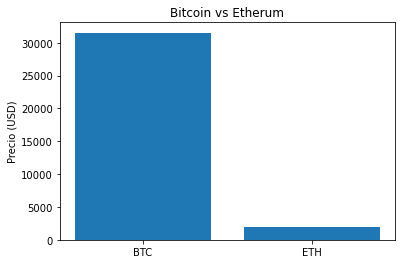

In [6]:
#Comparación BTC vs ETH del valor actual.
plt.title("Bitcoin vs Etherum")
plt.bar(df["symbol"][:2], df["quote.USD.price"][:2], label = "a")
plt.ylabel("Precio (USD)")